선수 sofifa ID 입력 시 4가지 항목 그래프 출력

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_2018='./pred/soccer18.csv'
df_2018=pd.read_csv(file_2018)
file_2019='./pred/soccer19.csv'
df_2019=pd.read_csv(file_2019)
file_2020='./pred/soccer20.csv'
df_2020=pd.read_csv(file_2020)
file_2021='./pred/soccer21.csv'
df_2021=pd.read_csv(file_2021)
file_2022='./pred/soccer22.csv'
df_2022=pd.read_csv(file_2022)
file_2023='./pred/soccer23.csv'
df_2023=pd.read_csv(file_2023)
file_2024='./pred/soccer24.csv'
df_2024=pd.read_csv(file_2024)
file_2025='./pred/soccer25.csv'
df_2025=pd.read_csv(file_2025)

df_2025.columns

C:\Users\KDP-26-\AppData\Local\Temp\ipykernel_15988\900089718.py:2: DtypeWarning: Columns (2,3,4,10,14,15,17,19,20,23,25,27,31,32,33,35,36,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,106,107,108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2018=pd.read_csv(file_2018)
C:\Users\KDP-26-\AppData\Local\Temp\ipykernel_15988\900089718.py:4: DtypeWarning: Columns (112,114,115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019=pd.read_csv(file_2019)
C:\Users\KDP-26-\AppData\Local\Temp\ipykernel_15988\900089718.py:6: DtypeWarning: Columns (112,114,115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020=pd.read_csv(file_2020)
C:\Users\KDP-26-\AppData\Local\Temp\ipykernel_15988\900089718.py:8: DtypeWarning: Columns (112,114,115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021=pd.read_csv(file_2021)


Index(['sofifa_id', 'name', 'overall', 'player_url', 'player_face_url', 'age',
       'height_cm', 'weight_kg', 'club', 'league', 'position', 'attacking',
       'skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping',
       'potential', 'value_eur', 'wage_eur'],
      dtype='object')

In [16]:
# 테스트용 임의 값 설정 -> 나중에 함수로 받기 ~
player_id=200104

In [17]:
df_player=pd.DataFrame()
df_player['2018']=df_2018[df_2018['sofifa_id']==player_id].iloc[0]
df_player['2019']=df_2019[df_2019['sofifa_id']==player_id].iloc[0]
df_player['2020']=df_2020[df_2020['sofifa_id']==player_id].iloc[0]
df_player['2021']=df_2021[df_2021['sofifa_id']==player_id].iloc[0]
df_player['2022']=df_2022[df_2022['sofifa_id']==player_id].iloc[0]
df_player['2023']=df_2023[df_2023['sofifa_id']==player_id].iloc[0]
df_player['2024']=df_2024[df_2024['sofifa_id']==player_id].iloc[0]
df_player['2025']=df_2025[df_2025['sofifa_id']==player_id].iloc[0]
df_player=df_player.T

player_name=df_player['name'][-1]
df_player=df_player[['sofifa_id','overall','potential', 'value_eur', 'wage_eur']]

# 단위 스케일링
df_player['value_eur']=df_player['value_eur']/1000000
df_player['wage_eur']=df_player['wage_eur']/1000

df_player=np.floor(df_player).astype(int)
df_player

,sofifa_id,overall,potential,value_eur,wage_eur
2018,200104,82,85,28,90
2019,200104,84,85,37,120
2020,200104,87,88,60,180
2021,200104,87,87,85,165
2022,200104,89,89,104,220
2023,200104,89,85,37,247
2024,200104,87,87,68,194
2025,200104,87,87,68,194


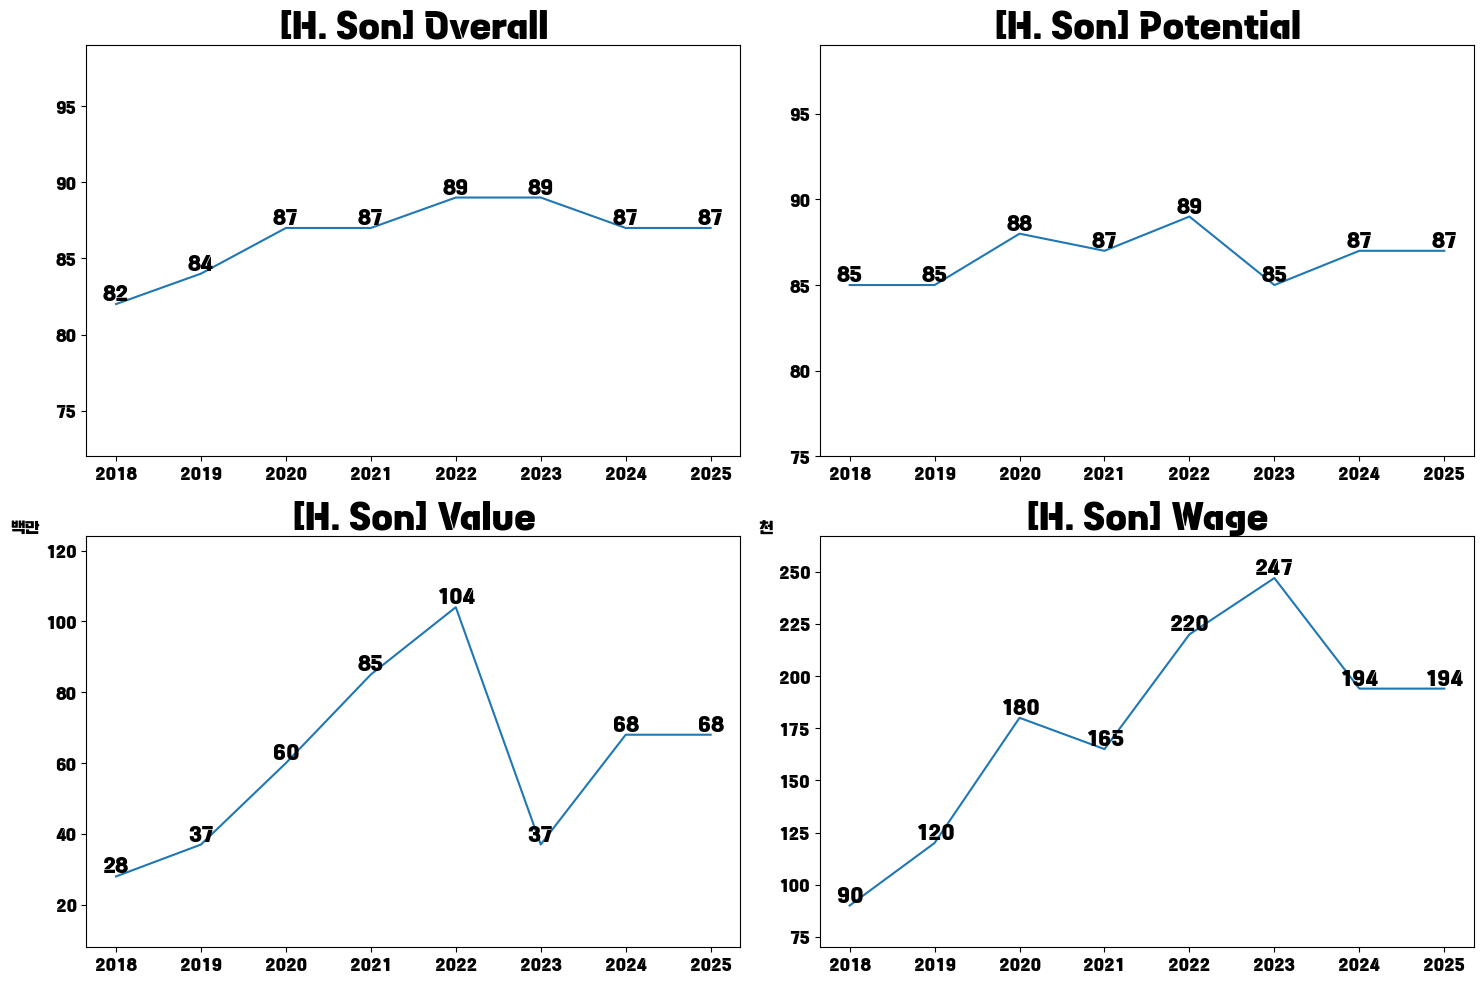

In [18]:
from matplotlib import font_manager

fe = font_manager.FontEntry(
    fname=r'C:\Users\KDP-26-\AppData\Local\Microsoft\Windows\Fonts\TENADA.ttf', # ttf 파일이 저장되어 있는 경로
    name='TENADA')                        # 이 폰트의 원하는 이름 설정
font_manager.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 12, 'font.family': 'TENADA'}) # 폰트 설정

fig, axes = plt.subplots(2,2, figsize=(15,10))

axes[0,0].plot(df_player.index, df_player[df_player.columns[1]])
axes[0,0].set_title(f'[{player_name}] Overall', size=25)
axes[0,0].set_ylim(df_player[df_player.columns[1]].min()-10,df_player[df_player.columns[1]].max()+10)
for i, v in enumerate(df_player[df_player.columns[1]]):
    axes[0,0].text(i, v, f'{v}', ha='center', va='bottom', size=15)

axes[0,1].plot(df_player.index, df_player[df_player.columns[2]])
axes[0,1].set_title(f'[{player_name}] Potential', size=25)
axes[0,1].set_ylim(df_player[df_player.columns[2]].min()-10,df_player[df_player.columns[2]].max()+10)
for i, v in enumerate(df_player[df_player.columns[2]]):
    axes[0,1].text(i, v, f'{v}', ha='center', va='bottom', size=15)

axes[1,0].plot(df_player.index, df_player[df_player.columns[3]])
axes[1,0].set_title(f'[{player_name}] Value', size=25)
axes[1,0].set_ylim(df_player[df_player.columns[3]].min()-20,df_player[df_player.columns[3]].max()+20)
axes[1,0].set_ylabel('백만', loc='top', rotation=0)
for i, v in enumerate(df_player[df_player.columns[3]]):
    axes[1,0].text(i, v, f'{v}', ha='center', va='bottom', size=15)

axes[1,1].plot(df_player.index, df_player[df_player.columns[4]])
axes[1,1].set_title(f'[{player_name}] Wage', size=25)
axes[1,1].set_ylim(df_player[df_player.columns[4]].min()-20,df_player[df_player.columns[4]].max()+20)
axes[1,1].set_ylabel('천', loc='top', rotation=0)
for i, v in enumerate(df_player[df_player.columns[4]]):
    axes[1,1].text(i, v, f'{v}', ha='center', va='bottom', size=15)

plt.tight_layout()
plt.show()